In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

diabetes = datasets.load_diabetes()
diab = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diab['Target']=diabetes.target
diab2 = diab.copy(deep=True)
print(diabetes)
print(diab)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10)), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59

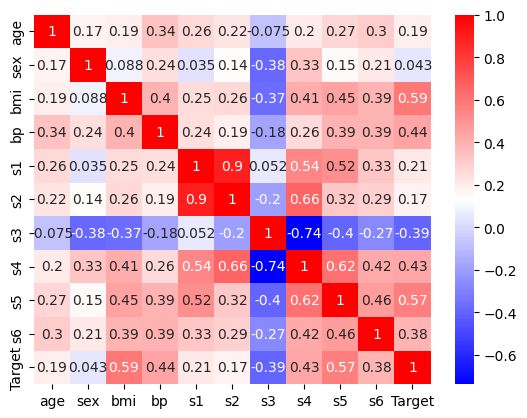

<Axes: >

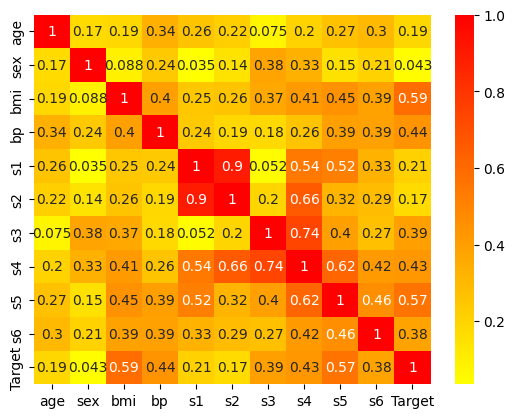

In [6]:
corr_matrix = diab.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.bwr)
plt.show()
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)

In [7]:
corr_target = abs(corr_matrix['Target'])
rel_vars = corr_target[corr_target>.4]
rel_vars.sort_values(ascending=False, inplace=True)

print(rel_vars)

Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
Name: Target, dtype: float64


In [11]:
x = diab[['bmi', 's5', 'bp', 's4']]
# inserting a column of 1's tells statsmodel to calculate an intercept value
x.insert(0, 'const', 1)
y = diab['Target']
regr = sm.OLS(y, x).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           5.41e-61
Time:                        11:39:34   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.653     57.344      0.0

In [12]:
# P>|t| values that are <.05 are significant so s4 should be removed.
x = diab[['bmi', 's5', 'bp']]
x.insert(0, 'const', 1)
y = diab['Target']
regr = sm.OLS(y, x).fit()
print(regr.summary())

     const       bmi        s5        bp
0        1  0.061696  0.019907  0.021872
1        1 -0.051474 -0.068332 -0.026328
2        1  0.044451  0.002861 -0.005670
3        1 -0.011595  0.022688 -0.036656
4        1 -0.036385 -0.031988  0.021872
..     ...       ...       ...       ...
437      1  0.019662  0.031193  0.059744
438      1 -0.015906 -0.018114 -0.067642
439      1 -0.015906 -0.046883  0.017293
440      1  0.039062  0.044529  0.001215
441      1 -0.073030 -0.004222 -0.081413

[442 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           7.16e-62
Time:                        11:57:41   Log-Likelihood:                -2402.6
No. Observ

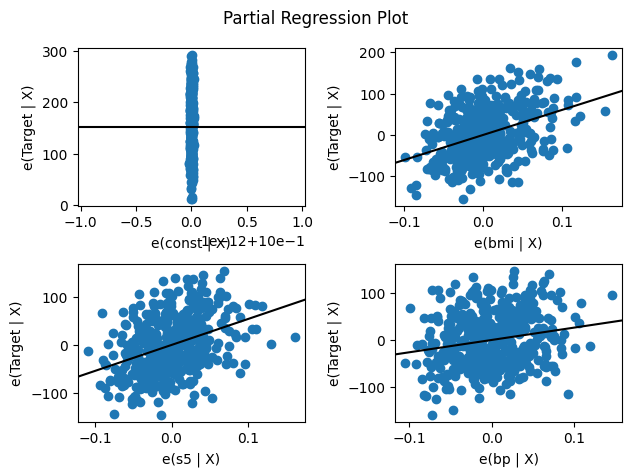

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig = sm.graphics.plot_partregress_grid(regr)
fig.tight_layout(pad=1.0)
plt.show()

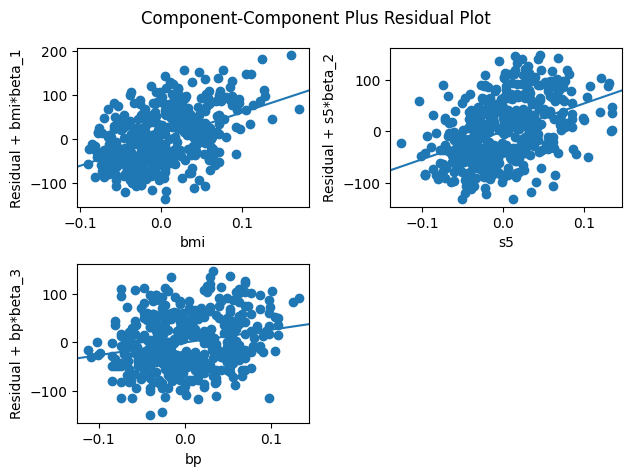

In [18]:
fig = sm.graphics.plot_ccpr_grid(regr)
fig.tight_layout(pad=1.0)
plt.show()

In [27]:
diab['y_pred'] = regr.predict(x)
diab['residual'] = diab['Target'] - diab['y_pred']
std_resid = diab['residual'].std()
diab['stand res'] = diab['residual']/std_resid
print(diab)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  Target      y_pred   residual  stand  re

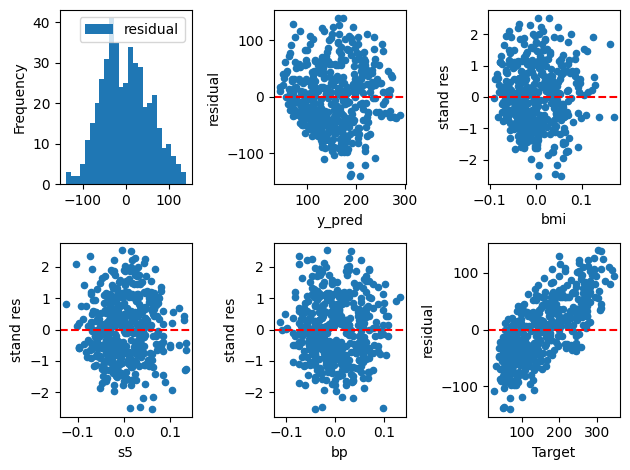

In [28]:
fig, ((hist1, res_y, res_bmi) , (res_y3, sres_x4, sres_x5)) = plt.subplots(2, 3)

diab.plot(y='residual', kind='hist', bins=25, ax=hist1)
diab.plot('y_pred', 'residual', kind='scatter', ax=res_y)
res_y.axhline(y=0, c='red', linestyle='dashed')
diab.plot('bmi', 'stand res', kind='scatter', ax=res_bmi)
res_bmi.axhline(y=0, c='red', linestyle='dashed')

diab.plot('s5', 'stand res', kind='scatter', ax=res_y3)
res_y3.axhline(y=0, c='red', linestyle='dashed')
diab.plot('bp', 'stand res', kind='scatter', ax=sres_x4)
sres_x4.axhline(y=0, c='red', linestyle='dashed')
diab.plot('Target', 'residual', kind='scatter', ax=sres_x5)
sres_x5.axhline(y=0, c='red', linestyle='dashed')

fig.tight_layout()
plt.show()